## Marco teórico — Varianza, distribución muestral e intervalos *bootstrap* (paso a paso)

> Objetivo: estimar la **varianza poblacional** $\sigma^2$ de una variable aleatoria X a partir de una **muestra** y cuantificar la **incertidumbre** de esa estimación con **intervalos de confianza** vía **bootstrap**.

---

### 0) Vocabulario mínimo (definiciones breves)

- **Población**: conjunto ideal de **todos** los valores posibles de X (la “realidad completa”).
- **Muestra**: los n datos observados $x_1,\dots,x_n$ (subconjunto finito de la población).
- **Parámetro**: número fijo que describe la población (p. ej., **varianza poblacional** $\sigma^2$).
- **Estimador**: regla que, usando la muestra, aproxima un parámetro (p. ej., **varianza muestral** $s^2$).
- **Distribución muestral**: distribución de probabilidad del **estimador** cuando repetimos el muestreo muchas veces.
- **Error estándar (EE)**: desviación estándar de la **distribución muestral** de un estimador (mide su “ruido”).
- **Intervalo de confianza (IC) $1-\alpha$**: procedimiento que produce un rango que **cubre** al parámetro verdadero en ≈ $100(1-\alpha)\%$ de repeticiones (el parámetro es fijo; el intervalo cambia con la muestra).
- **Percentil (cuantil)** $q_p$: valor que deja por debajo al $p\%$ de una colección de números.

---

### 1) El problema estadístico central

Queremos conocer cuánta **dispersión real** tiene X: su **varianza poblacional** $\sigma^2=\mathrm{Var}(X)$ (parámetro fijo, desconocido).

Con la muestra calculamos la **varianza muestral insesgada** (corrección de Bessel):
$
s^2 \;=\; \frac{1}{n-1}\sum_{i=1}^n (x_i-\bar x)^2,
\qquad
\bar x=\frac{1}{n}\sum_{i=1}^n x_i.
$

- $s^2$ es **estimador** de $\sigma^2$ (cambia de muestra en muestra).
- Para informar **incertidumbre** necesitamos saber “qué tan variable” es $s^2$ si repitiésemos el muestreo: **distribución muestral de $s^2$**.

Fuera de casos especiales, esa distribución **no es conocida** ⇒ usamos **bootstrap**.

---

### 2) Distribución de Fisher–Tippett tipo I (Gumbel) en este ejercicio

La consigna modela la **población** con una **Gumbel (tipo I)** (también Fisher–Tippett) con parámetros de **localización** $\mu$ y **escala** $\beta>0$. Su **CDF** (función de distribución acumulada) es:
$
F(x)=\exp\!\left(-e^{-\frac{x-\mu}{\beta}}\right).
$

Hechos útiles:
- **Media**: $\mathbb E[X]=\mu+\gamma\beta$, con $\gamma\approx 0.577216$ (constante de Euler–Mascheroni).
- **Varianza poblacional**: $\sigma^2=\dfrac{\pi^2}{6}\beta^2$.
- Caso del ejercicio: $\beta=1\Rightarrow \sigma^2=\pi^2/6\approx 1.644934$.
- **Para simular** datos (si hace falta): si $U\sim \mathrm{Unif}(0,1)$,
  $
  X=\mu-\beta\ln\big(-\ln U\big)\quad\text{tiene distribución Gumbel} .
  $

> Rol de la Gumbel aquí: define **la población** (forma ideal del histograma con infinitos datos) y nos da un **valor teórico** ($\pi^2/6$) para comparar.  
> El **bootstrap** no depende de conocer esta forma: trabaja directamente con **la muestra**.

---

### 3) Idea del *bootstrap* (no paramétrico)

**Remuestreo con reemplazo** de la muestra observada:
1. A partir de $x_1,\dots,x_n$, construir $B$ **muestras bootstrap** $x_1^{*(b)},\dots,x_n^{*(b)}$ eligiendo con reemplazo (cada dato observado tiene probabilidad $1/n$ en cada extracción).
2. En cada muestra bootstrap calcular el **estimador**: $s^{2*(b)}$.
3. La colección $\{s^{2*(1)},\dots,s^{2*(B)}\}$ **imita** la **distribución muestral** de $s^2$.

Con esa colección:
- **EE bootstrap** de $s^2$: desviación estándar de $\{s^{2*(b)}\}$.
- **IC** para $\sigma^2$: se construye a partir de los percentiles de $\{s^{2*(b)}\}$ u otras fórmulas (abajo).

> Interpretación: $\sigma^2$ es fijo; lo aleatorio es la **muestra** y, por ende, el **intervalo**. Un IC del $95\%$ significa que el **procedimiento** cubriría $\sigma^2$ ≈ 95/100 veces al repetir el estudio.

---

### 4) Métodos de intervalo de confianza con bootstrap

Sea $q_p$ el percentil $p$ de $\{s^{2*(b)}\}$ y $\alpha$ el nivel (p. ej. 0.05).

1. **Percentil**  
   $
   IC^{\text{perc}}_{1-\alpha}=\big[\,q_{\alpha/2},\,q_{1-\alpha/2}\,\big].
   $
   - Simple y robusto con asimetrías moderadas.

2. **Básico**  
   $
   IC^{\text{basic}}_{1-\alpha}=\big[\,2s^2 - q_{1-\alpha/2},\; 2s^2 - q_{\alpha/2}\,\big].
   $
   - “Re-centra” en el estimador observado \(s^2\).

3. **Normal (con EE bootstrap)**  
   Con $z_{1-\alpha/2}$ de la normal estándar (≈1.96 para 95%),
   $
   IC^{\text{norm}}_{1-\alpha}=\big[\,s^2 - z_{1-\alpha/2}\cdot EE_{\text{boot}},\;\; s^2 + z_{1-\alpha/2}\cdot EE_{\text{boot}}\,\big].
   $
   - Rápido; mejor cuando la distribución muestral es aproximadamente simétrica.

> Nota: **BCa** (bias-corrected and accelerated) mejora cobertura en muestras pequeñas/asimetrías fuertes (opcional si se necesita).

---

### 5) Procedimiento paso a paso (lo que luego codificamos)

**Entradas**: tamaño muestral $n$ , remuestreos $B$ (p. ej. 2000–5000), nivel $\alpha$ (p. ej. 0.05).

1. (Si se simula) **Generar** $x_1,\dots,x_n$ de Gumbel($\mu, \beta=1$).  
   (Si son datos reales: leerlos.)
2. **Calcular** $s^2$ con corrección de Bessel.
3. **Bootstrap**:
   - Para $b=1,\dots,B$:
     - Tomar una muestra bootstrap de tamaño $n$ **con reemplazo** desde $\{x_i\}$.
     - Calcular $s^{2*(b)}$.
   - Guardar la colección $\{s^{2*(b)}\}$.
4. **EE bootstrap**:
   $
   EE_{\text{boot}}(s^2) = \mathrm{sd}\big(\{s^{2*(b)}\}\big).
   $
5. **IC** (elegir método):
   - Percentil, Básico o Normal (con $EE_{\text{boot}}$).
6. **Reportar e interpretar**:
   - $s^2$, $EE_{\text{boot}}$, IC.  
   - Si la población es Gumbel($\beta=1$): comparar con $\sigma^2=\pi^2/6$.  
   - Comentar **ancho del IC** y cómo cambia si aumentamos $n$ (aprox. decrece como $1/\sqrt{n}$).

---


In [ ]:
# 0) Importamos librerias
import numpy as np
from math import log, pi, sqrt
from typing import Tuple, Dict, Literal

# Notación:
# - n: tamaño muestral
# - B: cantidad de remuestreos bootstrap
# - alpha: nivel de significancia (0.05 => IC 95%)

# TP2 — Varianza por bootstrap (IC SOLO PERCENTIL)
# Caso: Gumbel (Fisher–Tippett I) con mu=0, beta=1

In [45]:
# 1) Simular datos desde la población Gumbel (Fisher–Tippett tipo I) usando el método de la transformada inversa
# Notar que beta es el sigma del ejercicio 3 del tp2. En el ejercicio 3 se pide mu=0 y sigma=beta=1.

def sample_gumbel(n: int, mu: float = 0.0, beta: float = 1.0, seed=42):
    """Genera n observaciones de Gumbel(μ, β) por transformada inversa."""

    rng = np.random.default_rng(seed=seed)
    U = rng.uniform(0, 1, n)
    X = mu - beta * np.log(-np.log(U))
    return X

muestra = sample_gumbel(1000, mu=0, beta=1, seed=42) #lista de 1000 datos
print(muestra)

[ 1.36164003e+00  1.94151892e-01  1.88088879e+00  1.02042425e+00
 -8.59752378e-01  3.70177414e+00  1.29850929e+00  1.42413465e+00
 -7.20196844e-01  2.26084843e-01  7.93361436e-03  2.57629505e+00
  8.20376154e-01  1.63430056e+00  2.06715534e-01 -3.93226640e-01
  5.28420210e-01 -1.01223041e+00  1.66501580e+00  7.77840432e-01
  1.28389610e+00 -3.63065508e-02  3.51526726e+00  2.18007482e+00
  1.38415286e+00 -4.92627163e-01  2.71777723e-01 -1.14040517e+00
 -6.25363197e-01  9.64460625e-01  1.22183008e+00  3.41034525e+00
 -1.14572333e-01  7.01394450e-03  2.79756082e-01 -5.08934279e-01
 -7.13354048e-01  2.97116410e-01 -3.94205074e-01  9.14404449e-01
  1.89376983e-01  1.69767897e+00  1.03199260e+00 -1.51499439e-01
  1.69493793e+00  1.52691014e+00  5.33003305e-02 -2.18055588e-01
  9.62336399e-01 -6.76958038e-01 -4.76170205e-01 -1.59155639e+00
  1.42868790e+00  8.96016306e-01  1.05175850e+00  1.39623504e+00
  2.49887271e-01  5.72116467e-01 -6.76796190e-01 -7.73305807e-01
  9.09156116e-01  2.84097

In [48]:
# 2) Varianza muestral insesgada (estimador s^2, corrección de Bessel)
def varianza_insesgada(X):
    X = np.asarray(X)
    n = X.size
    if n < 2:
        raise ValueError("Se necesitan al menos 2 datos para varianza insesgada.")
    xbar = X.mean()
    s2 = ((X - xbar) ** 2).sum() / (n - 1)
    return float(s2)
varianza_n = varianza_insesgada(muestra) #varianza de la muestra de 1000 datos
print(f"Varianza muestral insesgada para n=1000 y B=1 : s^2 = {varianza_n:.6f}")

Varianza muestral insesgada para n=1000 y B=1 : s^2 =  1.654604


In [49]:
# 3) Bootstrap resampling de la varianza
n = 1000
B = 2000
muestra = sample_gumbel(n, mu=0, beta=1, seed=42)
varianza_n = varianza_insesgada(muestra)

bootstrap_varianza_n = np.empty(B) #crea un array vacio de tamaño B en donde pondremos las varianzas bootstrap
for b in range(B):
    idx = np.random.randint(0, n, size=n) # me genera n indices aleatorios entre 0 y n-1
    X_boot = muestra[idx] # remuestra bootstrap, me asegura que tenga tamaño n y que repita indices de la muestra original
    bootstrap_varianza_n[b] = varianza_insesgada(X_boot) # array de varianzas bootstrap

varianza_poblacional = (pi**2)/6
varianza_muestral_media = bootstrap_varianza_n.mean() # media de las varianzas bootstrap

print(f"Media de réplicas bootstrap: {varianza_muestral_media:.6f}")
print(f"Varianza poblacional teórica: {varianza_poblacional:.6f}")

Media de réplicas bootstrap: 1.650023
Varianza poblacional teórica: 1.644934


In [53]:
def bootstrap_funcion(Y):
    n=len(Y)
    B=2000
    bootstrap_varianzas = np.empty(B)
    for b in range(B):
        idx = np.random.randint(0, n, size=n) # indices con reemplazo
        Y_boot = Y[idx]
        bootstrap_varianzas[b] = varianza_insesgada(Y_boot)
    return bootstrap_varianzas


In [51]:
# 4) IC percentil
def intervalo_confianza_percentil(bootstrap_stats, alpha=0.05):
    lower = float(np.percentile(bootstrap_stats, 100 * (alpha / 2)))
    upper = float(np.percentile(bootstrap_stats, 100 * (1 - alpha / 2)))
    return lower, upper


ic_95 = intervalo_confianza_percentil(bootstrap_varianza_n, alpha=0.05)
print(f"IC 95% percentil: ({ic_95[0]:.6f}, {ic_95[1]:.6f})")

IC 95% percentil: (1.454017, 1.858859)


## Marco teórico — IC *percentil* para la varianza vía bootstrap

### Objetivo
Estimar la **varianza poblacional** $\sigma^2$ y obtener un IC bootstrap (percentil).

### Resumen
- Estimador: $s^2 = \frac{1}{n-1}\sum (x_i-\bar x)^2$.
- Bootstrap: remuestreo con reemplazo B veces, calcular $s^{2*}$.
- IC percentil 95%: $[q_{0.025}, q_{0.975}]$ de las réplicas.
- No usa suposiciones de normalidad de la distribución muestral.

In [58]:
# 6) Efecto del tamaño muestral 
Ns = [50, 100, 200, 500, 1000, 2000]
res = []
for i in Ns:
    muestra_i = muestra[:i]  # primeros i datos de la muestra original
    varianza_insesgada_i = varianza_insesgada(muestra_i)
    bootstrap_varianza_i = bootstrap_funcion(muestra_i)
    ic_95_i = intervalo_confianza_percentil(bootstrap_varianza_i, alpha=0.05)
    print(f"n={i}: s^2={varianza_insesgada_i:.6f}, s^2_boot={bootstrap_varianza_i.mean():.6f}, IC 95%: ({ic_95_i[0]:.6f}, {ic_95_i[1]:.6f})")

n=50: s^2=1.347939, s^2_boot=1.326999, IC 95%: (0.820321, 1.862225)
n=100: s^2=1.151239, s^2_boot=1.140411, IC 95%: (0.801795, 1.527695)
n=200: s^2=1.315721, s^2_boot=1.310583, IC 95%: (1.027512, 1.634106)
n=500: s^2=1.463419, s^2_boot=1.461426, IC 95%: (1.215347, 1.738913)
n=1000: s^2=1.654604, s^2_boot=1.652712, IC 95%: (1.458280, 1.860370)
n=2000: s^2=1.654604, s^2_boot=1.653561, IC 95%: (1.455311, 1.872096)


### Análisis del efecto de n
- El EE bootstrap y el ancho del IC decrecen ~ 1/√n.
- Para n pequeños la asimetría impacta más; percentil es adecuado.
- Para n grandes s^2 → π²/6.
- Columna ancho_IC*sqrt(n) casi estable respalda la relación.

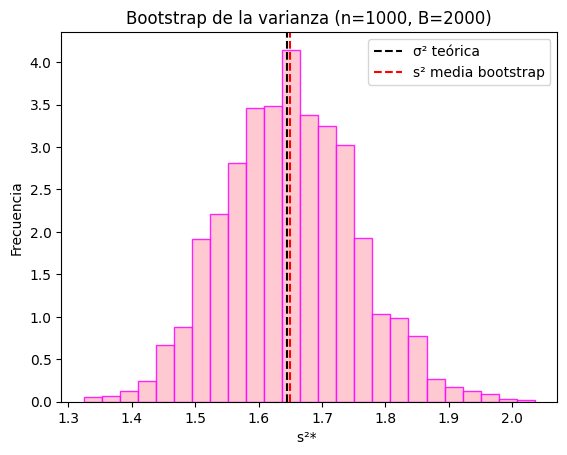

In [64]:
# 7) Histograma de las réplicas bootstrap
import matplotlib.pyplot as plt
plt.hist(bootstrap_varianza_n, bins=25, density=True, color='pink', edgecolor='fuchsia', alpha=0.85)
plt.axvline(varianza_poblacional, color='black', linestyle='--', label='σ² teórica')
plt.axvline(bootstrap_varianza_n.mean(), color='red', linestyle='--', label='s² media bootstrap')
plt.title('Bootstrap de la varianza (n=1000, B=2000)')
plt.xlabel('s²* ')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()